# Amazon reviews 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

The original dataset had over 500k reviews, but I created a new csv file of 5000 sample reviews in order to make it faster

In [57]:
df = pd.read_csv("reviews")
df.shape

(5000, 10)

In [58]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,341290,B001RVFEP2,A3EJRBPUFFECQP,Jen Y.,0,0,5,1351036800,great portion contolled snack,These are great to have around as a snack... i...
1,319199,B000Y02VZI,A30GCXZ6TLGVSC,Smiley,1,1,5,1330214400,Awesome frosting !! Tastes like homemade !!,I purchased three different brands of chocolat...
2,97646,B004JR2SDC,AT039NV5XTGQS,ronen,0,0,4,1350518400,Surprisingly good,Living in Seattle it is not easy to find good ...
3,135641,B000V9PGSG,APWY5SPO12LJQ,"Glenn E. Graham ""Glenn Earl""",1,1,2,1321833600,Too Bitter,"For Sumatra, it is too bitter for me. Bag was ..."
4,375274,B003H4I6V6,A3CORM17LRIRWA,Deborah Snyder,1,1,5,1328054400,BHUJA cracker mix,These never disappoint! They are such a nice m...


In [59]:
df["Text"].values[0]

"These are great to have around as a snack... it's ok to eat the whole bag!  My husband loves this bbq flavor."

### Exploratory Data Analysis

Text(0.5, 0, 'Review stars')

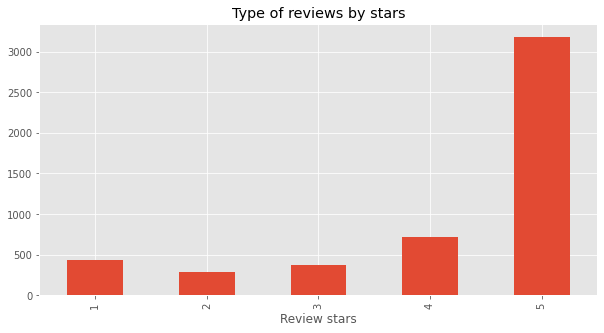

In [60]:
ax = df["Score"].value_counts().sort_index() \
    .plot(kind="bar", title="Type of reviews by stars", figsize=(10,5))

ax.set_xlabel('Review stars')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 4998 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


## Prepare data with the NLTK library

In [62]:
example = df['Text'][78]
example

'Love it, no problem with my order I am hoping that I am going to be able to find this product again...'

In [63]:
nltk.word_tokenize(example)[:8]

['Love', 'it', ',', 'no', 'problem', 'with', 'my', 'order']

### Preprocessing

In [64]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,341290,B001RVFEP2,A3EJRBPUFFECQP,Jen Y.,0,0,5,1351036800,great portion contolled snack,These are great to have around as a snack... i...
1,319199,B000Y02VZI,A30GCXZ6TLGVSC,Smiley,1,1,5,1330214400,Awesome frosting !! Tastes like homemade !!,I purchased three different brands of chocolat...


In [65]:
df.drop(columns=['UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], inplace = True)
df.head()

,Id,ProductId,Score,Summary,Text
0,341290,B001RVFEP2,5,great portion contolled snack,These are great to have around as a snack... i...
1,319199,B000Y02VZI,5,Awesome frosting !! Tastes like homemade !!,I purchased three different brands of chocolat...
2,97646,B004JR2SDC,4,Surprisingly good,Living in Seattle it is not easy to find good ...
3,135641,B000V9PGSG,2,Too Bitter,"For Sumatra, it is too bitter for me. Bag was ..."
4,375274,B003H4I6V6,5,BHUJA cracker mix,These never disappoint! They are such a nice m...


In [66]:
import string
from nltk.stem import WordNetLemmatizer
def preprocessing(text):
    text = text.strip()
    text = text.lower()
    text = ''.join(char for char in text if not char.isdigit())
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    tokenized = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized]
    cleaned_sentence = ' '.join(lemmatized)
    return cleaned_sentence

In [67]:
df['Clean_text'] = df['Text'].apply(preprocessing)

In [68]:
df['Clean_text'][78]

'love it no problem with my order i am hoping that i am going to be able to find this product again'

In [69]:
preprocesed_reviews = df['Clean_text']
preprocesed_reviews

0       these are great to have around a a snack it ok...
1       i purchased three different brand of chocolate...
2       living in seattle it is not easy to find good ...
3       for sumatra it is too bitter for me bag wa ok ...
4       these never disappoint they are such a nice mi...
                              ...                        
4995    best snack in the world love em shipped fast a...
4996    i love this teavery soothing and comforting it...
4997    we discovered this drink at a school picnic ju...
4998    our cat love it at least for now a anyone know...
4999    this food may be good for my cat but two of my...
Name: Clean_text, Length: 5000, dtype: object

### Classify positive and negative reviews

- If a review has a score of 4 or 5 we will classify it as positive
- If a review has a score of 3 or below we will classify it as negative

In [70]:
df.head(2)

,Id,ProductId,Score,Summary,Text,Clean_text
0,341290,B001RVFEP2,5,great portion contolled snack,These are great to have around as a snack... i...,these are great to have around a a snack it ok...
1,319199,B000Y02VZI,5,Awesome frosting !! Tastes like homemade !!,I purchased three different brands of chocolat...,i purchased three different brand of chocolate...


In [71]:
len(df)

5000

In [76]:
df = df[df['Score'] != 3].reset_index()

In [77]:
df['positive'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)
df.head(2)

,index,Id,ProductId,Score,Summary,Text,Clean_text,positive
0,0,341290,B001RVFEP2,5,great portion contolled snack,These are great to have around as a snack... i...,these are great to have around a a snack it ok...,1
1,1,319199,B000Y02VZI,5,Awesome frosting !! Tastes like homemade !!,I purchased three different brands of chocolat...,i purchased three different brand of chocolate...,1


In [78]:
len(df)

4628

## Bag of words

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

count_vect.fit(df['Clean_text'])

final_count = count_vect.transform(df['Clean_text'])
final_count

<4628x15649 sparse matrix of type '<class 'numpy.int64'>'
	with 240891 stored elements in Compressed Sparse Row format>

In [80]:
print(f'The shape of the BoW vectorizer: {final_count.shape}')
print(f'The number of unique words: {final_count.shape[1]}')

The shape of the BoW vectorizer: (4628, 15649)
The number of unique words: 15649


## Bi-grams

In [81]:
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=4000)
final_bigram_counts = count_vect.fit_transform(df['Clean_text'])

print(f'The shape of the BoW vectorizer: {final_bigram_counts.get_shape()}')
print(f'The number of unique words including unigrams and bigrams: {final_bigram_counts.shape[1]}')

The shape of the BoW vectorizer: (4628, 4000)
The number of unique words including unigrams and bigrams: 4000


## TF-IDF

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(df['Clean_text'])
print('Some sample features', tf_idf_vect.get_feature_names_out()[1:10])


final_tf_idf_vect = tf_idf_vect.transform(df['Clean_text'])

Some sample features ['able to' 'about' 'about every' 'about half' 'about how' 'about it'
 'about minute' 'about month' 'about of']


In [84]:
print(f'The shape of the tf-idf vectorizer: {final_tf_idf_vect.get_shape()}')
print(f'The number of unique words including unigrams and bigrams: {final_tf_idf_vect.shape[1]}')

The shape of the tf-idf vectorizer: (4628, 6375)
The number of unique words including unigrams and bigrams: 6375


In [85]:
df

,index,Id,ProductId,Score,Summary,Text,Clean_text,positive
0,0,341290,B001RVFEP2,5,great portion contolled snack,These are great to have around as a snack... i...,these are great to have around a a snack it ok...,1
1,1,319199,B000Y02VZI,5,Awesome frosting !! Tastes like homemade !!,I purchased three different brands of chocolat...,i purchased three different brand of chocolate...,1
2,2,97646,B004JR2SDC,4,Surprisingly good,Living in Seattle it is not easy to find good ...,living in seattle it is not easy to find good ...,1
3,3,135641,B000V9PGSG,2,Too Bitter,"For Sumatra, it is too bitter for me. Bag was ...",for sumatra it is too bitter for me bag wa ok ...,0
4,4,375274,B003H4I6V6,5,BHUJA cracker mix,These never disappoint! They are such a nice m...,these never disappoint they are such a nice mi...,1
...,...,...,...,...,...,...,...,...
4623,4994,45029,B0029NTQ1K,5,Hairball Control Chicken Favour Treat,Each of my three cats loves this flavor of the...,each of my three cat love this flavor of the t...,1
4624,4995,122801,B004SKOOHI,5,Still amazing,Best snack in the world love em!! Shipped fast...,best snack in the world love em shipped fast a...,1
4625,4996,269981,B008K9TIU6,5,My favorite tea,I love this tea...very soothing and comforting...,i love this teavery soothing and comforting it...,1
4626,4997,422579,B003LPMC3O,5,The kids think they are drinking soda pop!,We discovered this drink at a school picnic. ...,we discovered this drink at a school picnic ju...,1
